Coefficients from sklearn model:
Slope (Coefficient): 675.343658679135
Intercept: -1336226.704266511

Coefficients calculated manually:
Slope (Coefficient): [675.34365868]
Intercept: [-1336226.70426651]

Mean Squared Error (Sklearn model): 62644360.72375505
Root Mean Squared Error (Sklearn model): 7914.819058181623

Mean Squared Error (Manual calculation): 62644360.72375505
Root Mean Squared Error (Manual calculation): 7914.819058181623

Predicted gold price for the year 2025 (1 gram) using sklearn model: 3134.4204558737574

Predicted gold price for the year 2025 (1 gram) using manual model: [3134.42045587]

Error using sklearn model: 49815.579544126245
Error using manual model: [49815.57954413]


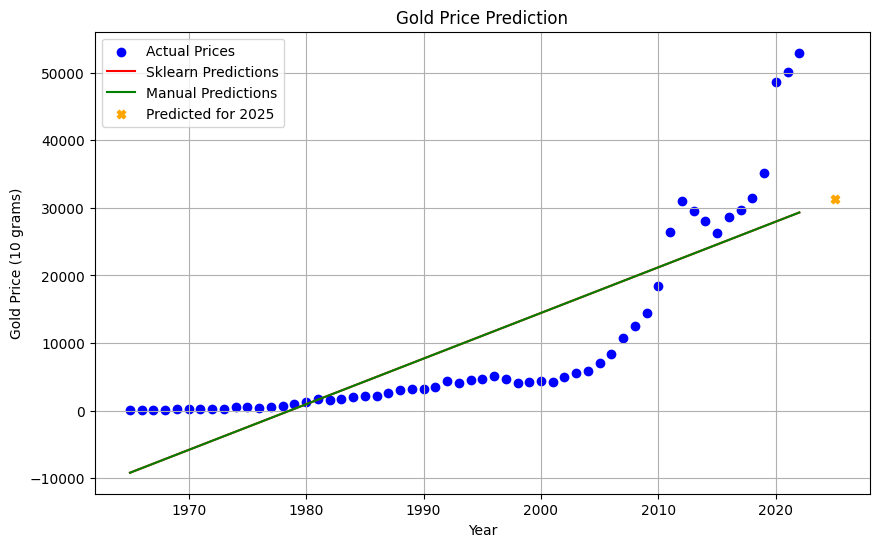

In [3]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('gold_rate.csv')

years = data['Year'].values.reshape(-1, 1)
gold_prices = data['Price (24 karat per 10 grams)'].values

# Create a Linear Regression model

model = LinearRegression()
model.fit(years, gold_prices)

# Calculate Coefficients

slope = model.coef_[0]
intercept = model.intercept_

print("Coefficients from sklearn model:")
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

# Manual calculation of coefficients

mean_year = years.mean()
mean_price = gold_prices.mean()

numerator = 0
denominator = 0

for i in range(len(years)):
    numerator += (years[i] - mean_year) * (gold_prices[i] - mean_price)
    denominator += (years[i] - mean_year) ** 2

manual_slope = numerator / denominator
manual_intercept = mean_price - manual_slope * mean_year

print("\nCoefficients calculated manually:")
print("Slope (Coefficient):", manual_slope)
print("Intercept:", manual_intercept)

# Make predictions using the model

predicted_prices = model.predict(years)

# Calculate Mean Squared Error and Root Mean Squared Error using sklearn

mse_sklearn = mean_squared_error(gold_prices, predicted_prices)
rmse_sklearn = math.sqrt(mse_sklearn)

print("\nMean Squared Error (Sklearn model):", mse_sklearn)
print("Root Mean Squared Error (Sklearn model):", rmse_sklearn)

# Calculate Mean Squared Error and Root Mean Squared Error manually

manual_mse = np.sum((gold_prices - predicted_prices) ** 2) / len(years)
manual_rmse = math.sqrt(manual_mse)

print("\nMean Squared Error (Manual calculation):", manual_mse)
print("Root Mean Squared Error (Manual calculation):", manual_rmse)

# Predict the gold price for the year 2025 (10 grams) using sklearn model

year_2025 = np.array([[2025]])
predicted_price_2025_sklearn = model.predict(year_2025)

print("\nPredicted gold price for the year 2025 (1 gram) using sklearn model:", predicted_price_2025_sklearn[0]/10)

# Predict the gold price for the year 2025 using manual model

predicted_price_2025_manual = manual_slope * year_2025 + manual_intercept

print("\nPredicted gold price for the year 2025 (1 gram) using manual model:", predicted_price_2025_manual[0]/10)

# Calculate errors for both predictions

error_sklearn = abs(predicted_price_2025_sklearn[0]/10 - gold_prices[-1])
error_manual = abs(predicted_price_2025_manual[0]/10 - gold_prices[-1])

print("\nError using sklearn model:", error_sklearn)
print("Error using manual model:", error_manual)

# Plotting the data

plt.figure(figsize=(10, 6))
plt.scatter(years, gold_prices, color='blue', label='Actual Prices')
plt.plot(years, predicted_prices, color='red', label='Sklearn Predictions')
plt.plot(years, manual_slope * years + manual_intercept, color='green', label='Manual Predictions')
plt.scatter(2025, predicted_price_2025_manual, color='orange', marker='X', label='Predicted for 2025')

plt.xlabel('Year')
plt.ylabel('Gold Price (10 grams)')
plt.title('Gold Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

# Load data
df = pd.read_csv('gold_silver.csv')

# Split data into features (x) and target (y)
x = df[['Year', 'Gold Rates']]
y = df['Silver Rates'] 

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Create and fit the sklearn Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Print coefficients obtained from the sklearn model
print("Coefficients from sklearn model:")
print("Intercept:", reg.intercept_)
print("Coefficient for Year:", reg.coef_[0])
print("Coefficient for Gold Price:", reg.coef_[1])

# Predict using the sklearn model
y_pred = reg.predict(x_test)

# Compare predicted and actual values using sklearn model
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(diff)

# Manual coefficient calculation
X1 = sum(x_train['Year'])
X2 = sum(x_train['Gold Rates'])
X12 = sum((x_train['Year']) ** 2)
X22 = sum((x_train['Gold Rates']) ** 2)
X1y = sum((x_train['Year']) * y_train)
X2y = sum((x_train['Gold Rates']) * y_train)
X1X2 = sum((x_train['Year']) * (x_train['Gold Rates']))
Y = sum(y_train)
n = len(x_train)

x1 = X12 - (X1 ** 2 / n)
x2 = X22 - (X2 ** 2 / n)
x1y = X1y - ((X1 * Y) / n)
x2y = X2y - ((X2 * Y) / n)
x1x2 = X1X2 - ((X1 * X2) / n)

b1 = ((x2 * x1y) - (x1x2 * x2y)) / ((x1 * x2) - (x1x2 ** 2))
b2 = ((x1 * x2y) - (x1x2 * x1y)) / ((x1 * x2) - (x1x2 ** 2))
b0 = (Y / n) - b1 * (X1 / n) - b2 * (X2 / n)

# Predict using the manually calculated coefficients
y_pred_manual = b0 + b1 * x_test['Year'] + b2 * x_test['Gold Rates']
diff_manual = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_manual})
print(diff_manual)

# Calculate R squared using the sklearn model
r_squared = reg.score(x_test, y_test)
print('R squared: {:.2f}'.format(r_squared * 100))

# Calculate errors and RMSE using manually predicted values
error_manual = sum(y_pred_manual - y_test) / len(y_test)
mse_manual = sum((y_pred_manual - y_test) ** 2) / len(y_test)
rmse_manual = math.sqrt(mse_manual)
print('Error:', error_manual)
print('MSE:', mse_manual)
print('RMSE:', rmse_manual)

# Predict the price of silver in 2024 using manually calculated coefficients
year_2024 = 2024
gold_price_2024 = 29054.52269729  
silver_price_2024 = b0 + b1 * year_2024 + b2 * gold_price_2024
print('Predicted price of silver in 2024:', (silver_price_2024)/1000)


Coefficients from sklearn model:
Intercept: -375502.4720595744
Coefficient for Year: 189.87223239442685
Coefficient for Gold Price: 1.1164266540460552
    Actual value  Predicted value
30         56900     35804.250952
36         37825     40590.850226
27         23625     19716.303764
4           3955      3771.898016
10          6646      6402.677421
    Actual value  Predicted value
30         56900     35804.250952
36         37825     40590.850226
27         23625     19716.303764
4           3955      3771.898016
10          6646      6402.677421
R squared: 76.13
Error: -4533.00392417046
MSE: 93610238.76547629
RMSE: 9675.238434554276
Predicted price of silver in 2024: 41.236169866588725
